In [1]:
%load_ext autoreload
%autoreload 2

In [108]:
from carla_birdeye_view import BirdViewProducerObjectLevelRenderer, PixelDimensions, BirdViewCropType

In [125]:
a = BirdViewProducerObjectLevelRenderer(
    PixelDimensions(600, 600),
    5, 
#     BirdViewCropType.FRONT_AREA_ONLY
)

In [4]:
import json

In [5]:
dct = json.load(open("/home/shadi/hdd/data/iteration_four_overfit_v2_nolights_with_random_traffic/all_towns_traffic_scenarios_public_RouteScenario_rightleft_rep0_05_01_00_08_55/bev_objectlevel/0010.json"))

In [126]:
res = a.as_rgb(dct["bev"])

Object:  {'class': 'Vehicle', 'extent': [1.5107464790344238, 4.901683330535889, 2.128324270248413], 'position': [0.0, 0.0, 0.0], 'yaw': 0, 'num_points': -1, 'distance': -1, 'speed': 1.654183011503386, 'brake': 0.0, 'id': 318, 'ego_matrix': [[-0.9999990463256836, -6.780800322303548e-05, 0.0013668558094650507, 277.8559265136719], [6.786180892959237e-05, -1.0, 3.932201798306778e-05, -249.87551879882812], [0.0013668531319126487, 3.941473914892413e-05, 0.9999990463256836, 0.03740859776735306], [0.0, 0.0, 0.0, 1.0]], 'ego_vehicle': True}
Object:  {'class': 'Vehicle', 'extent': [2.0377919673919678, 4.4804368019104, 2.069315195083618], 'position': [19.34492308423976, 51.66131740534441, -0.04311368189343745], 'yaw': -4.707966801394614, 'distance': 55.16447791813551, 'speed': 1.1187090927136674, 'brake': 0.0, 'id': 347, 'ego_matrix': [[0.0043540699407458305, 0.9999905228614807, -0.00012258588685654104, 258.51446533203125], [-0.9999375343322754, 0.00435510091483593, 0.010293342173099518, -198.212

In [70]:
from matplotlib import pyplot as plt

In [9]:
dct.keys()

dict_keys(['bev'])

In [17]:
res.shape

(400, 400, 3)

In [37]:
a.origin

Coord(x=353, y=353)

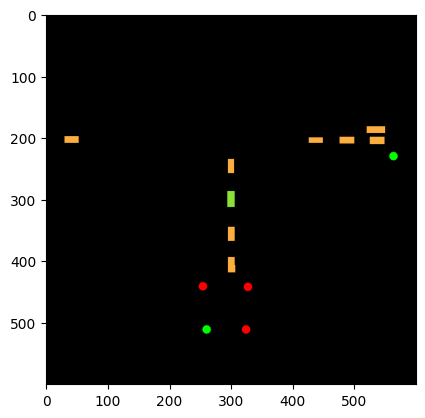

In [127]:
plt.imshow(res)

In [128]:
slts = a.as_slots(dct["bev"])

RENDERED
RENDERED
RENDERED
RENDERED
RENDERED
rendering light of color (255,) at location [260 511]
RENDERED
rendering light of color (255,) at location [254 441]
RENDERED
rendering light of color (255,) at location [324 511]
RENDERED
rendering light of color (255,) at location [563 230]
RENDERED
RENDERED
rendering light of color (255,) at location [327 442]
RENDERED
RENDERED
RENDERED


In [97]:
import numpy as np

In [100]:
slts.shape

(192, 192, 10)

In [105]:
np.argmax(slts.reshape(-1, 10), axis=0).tolist()

[0, 0, 0, 24475, 0, 0, 0, 0, 0, 0]

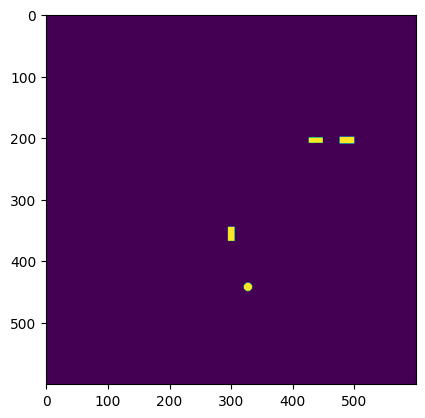

In [161]:
plt.imshow(slts[:, :, 9])

In [152]:
a.filter_objects_in_scene(dct["bev"])

[{'class': 'Vehicle',
  'extent': [2.0377919673919678, 4.4804368019104, 2.069315195083618],
  'position': [19.34492308423976, 51.66131740534441, -0.04311368189343745],
  'yaw': -4.707966801394614,
  'distance': 55.16447791813551,
  'speed': 1.1187090927136674,
  'brake': 0.0,
  'id': 347,
  'ego_matrix': [[0.0043540699407458305,
    0.9999905228614807,
    -0.00012258588685654104,
    258.51446533203125],
   [-0.9999375343322754,
    0.00435510091483593,
    0.010293342173099518,
    -198.212890625],
   [0.010293778963387012,
    7.776030543027446e-05,
    0.9999470114707947,
    0.018700407817959785],
   [0.0, 0.0, 0.0, 1.0]],
  'ego_vehicle': False},
 {'class': 'Vehicle',
  'extent': [2.560655355453491, 5.91519021987915, 1.9884328842163086],
  'position': [22.533351381144975, -47.010072725667186, -0.0416944954550722],
  'yaw': -1.56796472076587,
  'distance': 52.1315700949973,
  'speed': 1.6146893482879623,
  'brake': 0.0,
  'id': 345,
  'ego_matrix': [[-0.00276363268494606,
    -0.9

In [151]:
len(a.filter_objects_in_scene(dct["bev"]))

13

In [162]:
?BirdViewProducerObjectLevelRenderer

In [174]:
b = BirdViewProducerObjectLevelRenderer(
    PixelDimensions(600, 600),
    5, 
#     BirdViewCropType.FRONT_AREA_ONLY
    num_slots=3
)

In [175]:
objs = b.filter_objects_in_scene(dct["bev"])

In [176]:
len(objs)

13

In [177]:
slts = b.as_slots(objs)

rendering light of color (255,) at location [260 511]
RENDERED
RENDERED
rendering light of color (255,) at location [254 441]
RENDERED
RENDERED
RENDERED
RENDERED
rendering light of color (255,) at location [563 230]
RENDERED
RENDERED
RENDERED
RENDERED
rendering light of color (255,) at location [327 442]
RENDERED
RENDERED
rendering light of color (255,) at location [324 511]
RENDERED


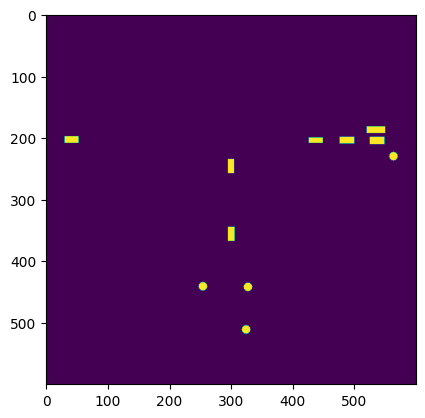

In [181]:
plt.imshow(slts[:, :, -1])